<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/actuales/ICDIC_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1: Análisis Exploratorio de Datos y Series Espacio-Temporales

**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con la limpieza, el análisis y la visualización de datos en Python. Además, se abordarán series temporales y espaciales con QGIS.

**Librerías:** En este trabajo se utilizará:

*   Numpy: matemática básica y definición de matrices y vectores
*   Pandas: manipulación y el análisis de datos
*   Seaborn/Matplotlib: construcción de gráficos

También necesitaremos de las librerías io y zipfile para acceder a los datos que serán analizados.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import io
import zipfile

In [ ]:
!gdown --id 1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5
!unzip /content/Molinetes_2023.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5
From (redirected): https://drive.google.com/uc?id=1gA40FsZM5-fqFPbP5azTzI7ACkK_CvW5&confirm=t&uuid=4495cd0d-dec1-4a46-9000-183fe36eb4b6
To: /content/Molinetes_2023.zip
100% 95.8M/95.8M [00:01<00:00, 67.9MB/s]
Archive:  /content/Molinetes_2023.zip
  inflating: Molinetes_2023.csv      


Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Análisis de datos: Galpones según su cerramiento

El primer ejercicio consiste en la visualización y exploración de datos, adentrándonos en lo que es la extracción de información de los mismos. Para ello utilizaremos un dataset de galpones metálicos diseñados siguiendo los reglamentos de EE.UU. y acorde a la práctica profesional habitual allí.

Estos datos fueron creados por Matthew D. Smith y Chia-Ming Uang. Pueden acceder al trabajo original a través del siguiente [link](https://escholarship.org/uc/item/4jt5p805), a partir del cual se generó el archivo `.csv` a utilizar por ustedes.

Lo pueden encontrar en el Campus de la materia.

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Galpones_v2.csv to Galpones_v2.csv


In [ ]:
#Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Galpones_v2.csv']))
df.head()

,Frame,W_kip_,Height_in_,L_ft_,alpha,Cladding,Structure,Roof,Snow_psf,Seismic,Wind,Weights,k_lat_kip_ft_,MassParticipation,T_model_s_,T_r1_s_,T_r2_s_,T_S_U_s_
0,1,10.21,190.0,40,2.526,Metal Panels,Clear Span,Monoslope,0,Low,High,0.011666,3.520,0.933,0.546,0.546,0.545,0.707386
1,2,25.16,192.5,100,6.234,Metal Panels,Clear Span,Gabled,0,Low,High,0.032986,12.459,0.619,0.571,0.560,0.454,0.537498
2,3,46.71,220.0,160,8.727,Metal Panels,Clear Span,Monoslope,0,High,High,0.001667,27.663,0.423,0.606,0.580,0.415,0.423907
3,4,13.14,400.0,40,1.200,Metal Panels,Clear Span,Gabled,0,Low,High,0.002174,3.563,0.930,0.602,0.602,0.614,0.953937
4,5,52.23,385.0,100,3.117,Metal Panels,Clear Span,Monoslope,42,High,Low,0.001058,7.218,0.925,0.881,0.880,0.860,1.208260


Para facilitar el estudio del dataset, les presentamos las descripciones de cada una de las columnas:

* **Frame**: Número de pórtico en Dataset
* **W_kip_**: Peso de la estructura en $kip$
* **Height_in_**: Altura media del pórtico en $inches$
* **L_ft_**: Longitud total del pórtico en $feet$
* **alpha**: Relación de aspecto "Luz libre/Altura"
* **Cladding**: Característica del cerramiento (Chapa u hormigón)
* **Structure**: Tipología estructural (Clear Span/sin columnas intermedias o Modular/con columnas intermedias)
* **Roof**: Tipo de techo (Monoslope/1 pendiente o Gabled/a dos aguas)
* **Snow_psf**: Carga de nieve en $psf$ (pounds per square foot)
* **Seismic**: Clasificación de la zonificación sísmica (Low-High)
* **Wind**: Clasificación del viento de diseño (Low-High)
* **Weights**: Factor de ponderación para el análisis
* **k_lat_kip_ft_**: Rigidez lateral del pórtico en $kip/ft$
* **MassParticipation**: Participación en masa del primer modo de vibración
* **T_model_s_**: Período natural de la estructura en segundos
* **T_r1_s_**: Cálculo simplificado del período (método detallado)
* **T_r2_s_**: Cálculo simplificado del período (método sencillo)
* **T_S_U_s_**: Estimación del período según una fórmula empírica


Como background, este dataset fue creado con el objetivo de encontrar una ecuación empírica para estimar el período natural de un galpón sin necesidad de hacer un análisis dinámico. Como comentario, la ecuación a la que se llegó a partir de una regresión lineal ponderada es la siguiente, válida en principio para todos los galpones:

$$T_{a} = \left\{ \begin{array}{lrl} 0.058\left( W h\right)^{0.3} & \alpha \leq 3 &\\ 1.58W^{0.16}/ \alpha & \alpha > 3 &. \end{array} \right.$$

Más allá de eso, los datos se prestan para mucho más: en este ejercicio vamos a tratar de sacarle más jugo al mismo.

Como arranque, les damos una información propia del área de estudio que nos da una primera pista para nuestra investigación.

**Los galpones con pared de chapa no se diseñan igual que los que tienen paredes de hormigón**. Sin entrar en detalles, se usan distintos criterios de diseño.

Por lo tanto, sería interesante ver cómo repercute eso y ver qué diferencias generan. Tal vez luego se pueda usar esa información para clasificar galpones, o para mejorar las predicciones de período.

### Influencia de variables categóricas

Lo primero que vamos a analizar es si las distintas clasificaciones del galpón (tipo de techo, tipo de estructura, clasificación de la zona sísmica y de viento) tienen influencia en los períodos naturales, y si esa diferencia es igual entre los que tienen paredes de chapa y hormigón.

***NOTA:*** *todo lo que vamos a ver en este ejercicio es de índole causal y se puede explicar mediante modelos físicos. Para el TP, nos interesa enforcarnos simplemente en las relaciones empíricas*

#### **Actividad 1**

A continuación se presentan una serie de boxplots viendo el efecto de las distintas categorías.

¿Cuáles de ellas parecen influir en el período? ¿Esa influencia depende del cerramiento? ¿Tuvo sentido separarlo?

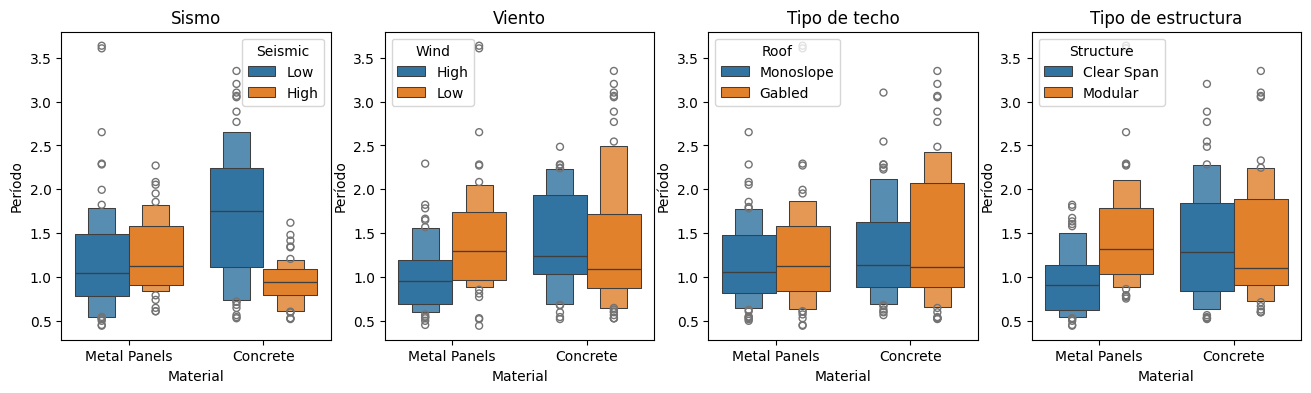

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Seismic', ax=axes[0]
              ).set(title='Sismo', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Wind', ax=axes[1]
              ).set(title='Viento', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Roof', ax=axes[2]
              ).set(title='Tipo de techo', xlabel='Material', ylabel='Período')

sns.boxenplot(data=df, x='Cladding', y='T_model_s_', hue='Structure', ax=axes[3]
              ).set(title='Tipo de estructura', xlabel='Material', ylabel='Período')

plt.show()

**Su respuesta**:

Recordemos que el período natural de una estructura es

$$T=2\pi\sqrt{\frac{W}{gK}}$$

Es decir, es una función del peso (la masa). ¿Este nuevo dato cambiará las conclusiones anteriores?

#### **Actividad 2**

Realice un análisis similar al anterior para ver cómo el *peso* y la *longitud* del galpón cambia según la tipología estructural y el tipo de cerramiento.

¿En base a estos nuevos datos, cambiaría su hipótesis sobre qué variables afectan al período? Es decir, ¿hay un efecto que se veía anteriormente que puede ser justificado por otra cosa y no necesariamente su clasificación en sí misma?

***NOTA:*** *Son 2 gráficos, nosotros ya les damos los subplots definidos, ustedes tienen que hacer cáda gráfico en el `axes[i]` correspondiente.*

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

################################################################################
# CODIGO DEL ALUMNO



################################################################################

plt.show()

**Su respuesta**:

### Influencia de variables continuas

Siguiendo con lo anterior, nos interesa ver si el período puede ser explicado no sólo a partír de lo visto arriba, sino también con variables continuas (altura y relación de lados).

Ya sabemos que el peso más o menos algo va a influir (esto tiene sus pormenores, pero avancemos).

Lo que nos interesa ver primero es: ¿La altura afecta al peso? ¿Y afecta el período? ¿Esas respuestas son iguales para todo galpón?

#### **Actividad 3**

Construya dos gráficos a elección que muestren la relación período-altura, uno para cada tipo de cerramiento. En cada gráfico, separe de alguna forma identificable según la zonificación sísmica.

¿En qué casos la altura del edificio parece influir más y menos en el período? ¿Nota alguna que otra cosa más que vimos antes?

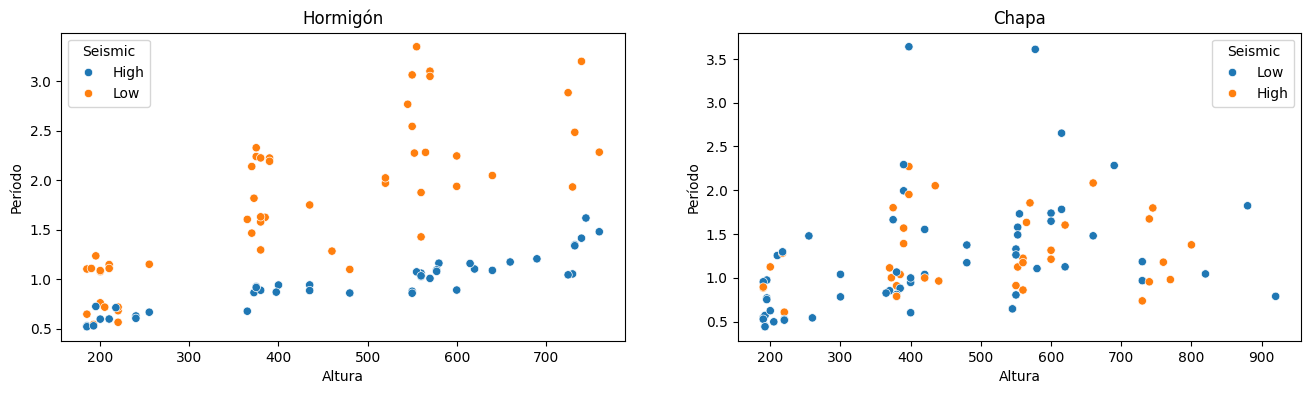

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

################################################################################
# CODIGO DEL ALUMNO



################################################################################

plt.show()

**Su respuesta**:

#### **Actividad 4**

Haga un gráfico para la relación altura-peso, identificando con colores el tipo de cerramiento. ¿Qué nota? ¿La influencia de la altura es siempre igual?

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

################################################################################
# CODIGO DEL ALUMNO



################################################################################

plt.show()

**Su respuesta**:

### Precisión de cálculos sencillos

Como nota de color, el análisis que se hizo arriba permite justificar que, en edificios con criterios de diseño similares a los de galpones con paredes de hormigón, la altura del mismo es la mejor variable para predecir el período natural.

Más allá de eso, lo que nos interesa ahora es ver cuándo la forma sencilla de calcular el período se parece a la solución real (y cuándo no).

#### **Actividad 5**

Construya un pair-plot que combina los efectos de la Altura, Longitud, Peso y Factor de participación, con el Factor de participación y una nueva variable de nombre `ratio`.

Esta variable o columna nueva del Dataframe será el cociente entre el período sencillo `T_r2_s_` y el real `T_model_s_`.

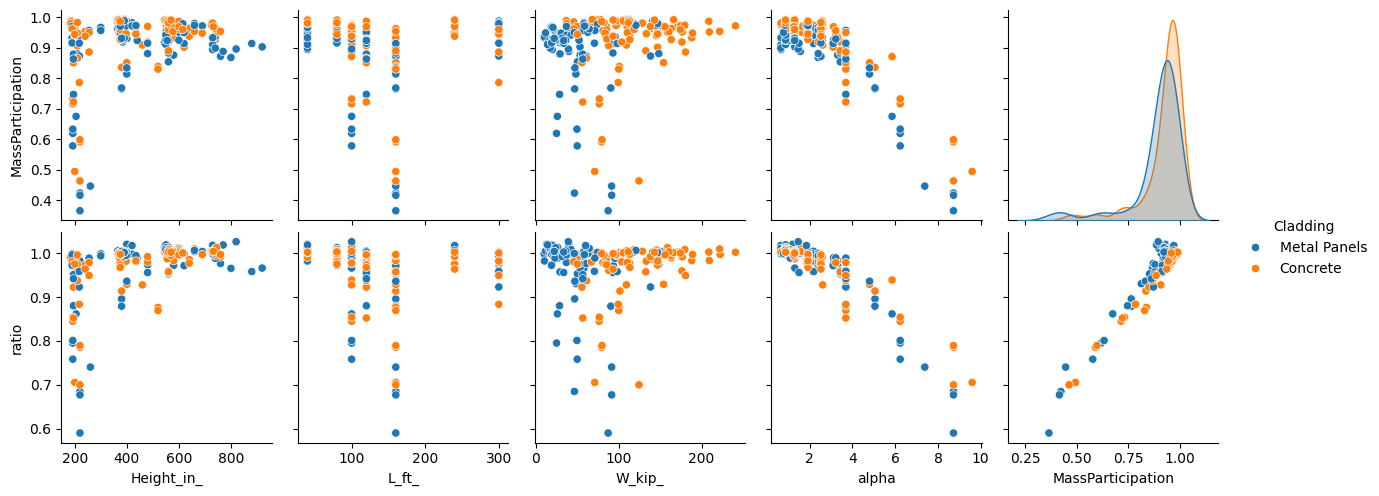

In [ ]:
# Método simplificado
################################################################################
# CODIGO DEL ALUMNO


################################################################################


# Pair plot
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()



#### **Actividad 6**

Presente la misma información pero mediante un mapa de calor.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

#### **Actividad 7**

Ahora, por las dudas, construya lo mismo pero separado con 2 mapas, según el tipo de cerramiento.

In [ ]:
# DataFrame con datos de paneles metálicos
df_metal = df.loc[df['Cladding'] == 'Metal Panels']
df_metal_corr = df_metal[[ 'Height_in_', 'L_ft_', 'W_kip_', 'alpha', 'MassParticipation', 'ratio']].corr().round(2)

# DataFrame con datos de hormigón
df_concrete = df.loc[df['Cladding'] == 'Concrete']
df_concrete_corr = df_concrete[[ 'Height_in_', 'L_ft_', 'W_kip_', 'alpha', 'MassParticipation', 'ratio']].corr().round(2)


# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(16,4))

################################################################################
# CODIGO DEL ALUMNO

################################################################################
plt.show()

#### **Actividad 8**

En función de los gráficos anteriores:

1. ¿Los mapas de calor presentan conclusiones similares respecto a las relaciones peso-altura estudiadas antes?
2. ¿De qué parece depender la precisión del método sencillo? O, dicho de mejor manera, ¿cómo podría predecir si funciona o no? ¿Mediante qué variables? ¿Depende del cerramiento?
3. En la pregunta anterior notará que hay dos variables posibles. Si tuviese que elegir una (veremos en TPs subsiguientes que no está bueno usar predictores correlacionados), ¿cuál usaría como predictor?

**Su respuesta**:

### Precisión de estimación empírica

Por último, veamos si efectivamente la estimación empírica cumple con su objetivo de funcionar para todos los tipos de galpones y sitios de emplazamientos.

#### **Actividad 9**

Construya una nueva columna en el Dataframe `ratio2` que sea la diferencia entre el período estimado `T_S_U_s_` y el real `T_model_s`. Luego, construya dos box plots discriminando entre zonificación sísmica y viento de diseño para cada tipo de cerramiento.

In [ ]:
# Cuando funciona el metodo simplifcado
################################################################################
# CODIGO DEL ALUMNO


################################################################################

fig, axes = plt.subplots(1, 2, figsize=(16,4))
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()


#### **Actividad 10**

¿Cuándo funciona la fórmula estimada? ¿Cuándo no? Identifique el caso más crítico. En base a lo que venimos analizando, ¿por qué ocurre y qué recomendaría hacer para mejorarlo? Considere que si el boxplot está aproximadamente por debajo de 1.25 que los resultados son aceptables ingenierilmente (idealmente estaría centrado en 1, pero magia no hay)

***NOTA:*** *Antes de contestar recuerde que hay muchas variables en juego, tal vez mirar un gráfico sólo lleve a conlusiones erróneas. Preste atención a los dos en su conjunto. Por ejemplo, el efecto del viento en estructuras de hormigón era poco importante, así que lo que diga ese boxplot aporta poco (tiene mucho más/menos)*

**Su respuesta**

## Ejercicio 2: Análisis Exploratorio de datos y Series temporales: Subtes de Buenos Aires

Para realizar el segundo ejercicio, se debe cargar el Dataset con los datos de los molinetes de los subtes de Ciudad de Buenos Aires durante el año 2023.

In [ ]:
#Se crea un DataFrame
df = pd.read_csv("/content/Molinetes_2023.csv", sep=";")
df.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Alem_S_Turn04,Leandro N. Alem,0,0,2,2
1,1/1/2023,07:45:00,08:00:00,LineaA,LineaA_Acoyte_S_Turn01,Acoyte,0,0,2,2
2,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Lacroze_E_Turn06,Federico Lacroze,3,0,0,3
3,1/1/2023,07:45:00,08:00:00,LineaB,LineaB_Pasteur_S_Turn02,Pasteur,1,0,0,1
4,1/1/2023,07:45:00,08:00:00,LineaC,LineaC_Constitucion_Plaza_Turn04,Constitucion,1,0,0,1


#### **Actividad 1**

Observe el DataFrame generado.
- ¿Qué columnas son necesarias conservar para analizar la cantidad de pasajeros en las diferentes estaciones de las líneas de subte de CABA, para distintos períodos de tiempo?
- ¿Considera que hay palabras o datos prescindibles en las columnas o entre columnas?

Conserve las columnas a utilizar y realice la limpieza necesaria de los datos conservados.

In [ ]:

################################################################################
# CODIGO DEL ALUMNO


################################################################################
df.head()

- Utilizando `df.info()`, ¿Qué información obtiene? ¿Qué cambios podría realizar en los tipos de dato?

***AYUDA:*** *si se utiliza `pd.to_datetime()` en una columna con una fecha con un formato conocido, el tipo de dato se modifica correctamente y sin inconvenientes. Por otro lado, si se utiliza con una columna que posee una hora únicamente, el tiempo se identificará, pero completará con una fecha determinada por Python.*

*Para evitarlo, cree una columna que contenga la fecha, un espacio y la hora, y a esa nueva columna transfórmela con `pd.to_datetime()`.*

In [ ]:
df.info()

In [ ]:
################################################################################
# CODIGO DEL ALUMNO



################################################################################
df.info()

**Respuesta:**

- Construya nuevas columnas con el año, el mes, la semana, el día, el día de semana (en número y nombre del día) y la hora.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO



################################################################################
df.head()

,FECHA,DESDE,LINEA,MOLINETE,ESTACION,pax_TOTAL,FECHA DESDE,AÑO,MES,DIA,DIA_SEMANA,DIA_SEMANA_NOMBRE,HORA
0,2023-01-01,07:45:00,B,Turn04,Leandro N. Alem,2,2023-01-01 07:45:00,2023,1,1,6,Sunday,7
1,2023-01-01,07:45:00,A,Turn01,Acoyte,2,2023-01-01 07:45:00,2023,1,1,6,Sunday,7
2,2023-01-01,07:45:00,B,Turn06,Federico Lacroze,3,2023-01-01 07:45:00,2023,1,1,6,Sunday,7
3,2023-01-01,07:45:00,B,Turn02,Pasteur,1,2023-01-01 07:45:00,2023,1,1,6,Sunday,7
4,2023-01-01,07:45:00,C,Turn04,Constitucion,1,2023-01-01 07:45:00,2023,1,1,6,Sunday,7


Ahora que tenemos los datos limpios para lo que queremos hacer, avancemos:

#### **Actividad 2**

¿Cuáles son las líneas más utilizadas? Crea un nuevo dataframe que muestre esta información, llamado `df_total` y realiza un gráfico de barras.


***AYUDA:*** *Se ha agregado un diccionario con los colores de las líneas de subte. Uno de los parámetros de `sns.barplot()` debe ser `hue='LINEA'` y `palette=colores` para que se apliquen.*

In [ ]:
colores = {
    'A': '#00b2e0',
    'B': '#fc4c41',
    'C': '#0068b3',
    'D': '#198769',
    'E': '#8c1e92',
    'H': '#f3cb40'
}

In [ ]:
# Creación del DataFrame: df_total
################################################################################
# CODIGO DEL ALUMNO


################################################################################

# Gráfico:
################################################################################
# CODIGO DEL ALUMNO


################################################################################

#### **Actividad 3**

¿Cuáles son las 10 estaciones más concurridas? Crea un nuevo dataframe que muestre esta información, llamado `df_estacion` y realiza un gráfico de barras.

In [ ]:
# Creación del DataFrame: df_estacion
################################################################################
# CODIGO DEL ALUMNO


################################################################################


# Gráfico:
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

#### **Actividad 4**

¿Cuál o cuáles son las horas pico para cada línea en el subte de CABA? Crea un nuevo dataframe que muestre esta información, llamado `df_hora` y realiza un gráfico de línea.

In [ ]:
# Creación del DataFrame: df_hora
################################################################################
# CODIGO DEL ALUMNO


################################################################################


# Gráfico:
################################################################################
# CODIGO DEL ALUMNO



################################################################################
plt.show()

#### **Actividad 5**

Realiza un gráfico de línea donde se observe el número de pasajeros por día a lo largo del tiempo. ¿Observa alguna tendencia o estacionalidad? Crea nuevos dataframes que muestre esta información para todo el año 2023, para un mes y una semana en particular y realiza los gráficos.


In [ ]:
# Gráfico: año 2023
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

In [ ]:
# Gráfico: un mes particular
################################################################################
# CODIGO DEL ALUMNO


################################################################################
plt.show()

**Respuesta**:

#### **Actividad 6**

Suavice la curva anterior, calculando la media móvil con una ventana de 30 días. ¿Observa algo? Grafique ambas curvas en la misma figura para comparar.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO



################################################################################
plt.show()

**Respuesta:**

#### **Actividad 7**

Realice un gráfico de caja por cada día de la semana ¿Observa alguna tendencia o estacionalidad?

In [ ]:
################################################################################
# CODIGO DEL ALUMNO



################################################################################

**Respuesta**:

#### **Actividad 8**

Mediante un gráfico de correlación, demuestre la tendencia y/o estacionalidad que ha identificado en lo puntos anteriores.

In [ ]:
################################################################################
# CODIGO DEL ALUMNO


################################################################################

## Ejercicio 3: Datos espaciales con Sistemas de Información Geográfica

Este ejercicio va a ser su introducción a la utilización de GIS, en particular QGIS (ya que es libre). A futuro esto les servirá para tener una base en para vida profesional.

A continuación se índican las cuencas a analizar:

- **Grupos PARES (2, 4, 6...)**: Cuenca de Río Segundo
- **Grupos IMPARES (1, 3, 5...)**: Cuenca de Río Tercero
- **Posgrado**: Cuenca de Río Cuarto

Y datos a considerar:

* **Grupos Menores a 7**: Edificios educativos
* **Grupos Mayores o Iguales a 7**: Hospitales
* **Posgrado**: A elección

**Paso 1**: Generación de subcuencas.
En la "[Guía para la generación de Cuencas en QGIS](https://github.com/mbalbi/ciencia_de_datos/blob/main/tps/actuales/Guia%20para%20la%20generaci%C3%B3n%20de%20Cuencas%20en%20QGIS.pdf)" se detalla el procedimiento para calcular una cuenca a partir de un punto de cierre y el Modelo Digital de Elevación (DEM).

La cuenca se proporcionará a través del campus de la materia. Por otro lado, el Modelo Digital de Elevaciones (MDE) lo pueden descargar en el siguiente link:   [MDE](https://drive.google.com/file/d/1kFuXsfpWei3ePexQ0QuqE2W5Wrhu2ei4/view?usp=drive_link)

Se recomienda fuertemente que comprendan cada paso del proceso antes de proceder con la siguiente etapa.



**Paso 2**: Carga de datos vectoriales.
Cargar en QGIS los datos de los radios censales (*DatosBasicos*) y los edificios educativos  (*EdifEducativos*) u Hospitales (*EdifSalud*) según corresponda.

**Paso 3**: Análisis de datos y presentación de resultados.

Los mapas deben ser creados utilizando el complemento "Composer" de QGIS para presentar los resultados del análisis.


#### **Actividad 1**

¿Cuál es la cantidad de habitantes en la cuenca según el Censo 2010?

**Ayudas**:
1.   Calcular el área (Area_Total) de los radios censales con la calculadora de campos la tabla de atributos de la capa.

2.   Con la herramienta **Select by location**: seleccionar los radios censales de la capa: *DatosBasicos* que intersectan con la cuenca generada.

3.   Con la herramienta **Clip** cortar los elementos de la capa *DatosBasicos* seleccionados. (recordar marcar la casilla “sólo elementos seleccionados”).

4.  Calcular el área (Area_Cuenca) de los elementos (de la capa *DatosBasicos _Clip*) y calcular la relación Area_Cuenca/Area_Total.

5.  Seleccionar los radios censales con una relación menor a 0.20 y eliminarlos. Actualizar los valores de la población (‘Hab’) usando el porcentaje del área del radio censal en la cuenca.

6.  Con la herramienta **Show Statistical Summary** calcular la cantidad total de habitantes.

#### **Actividad 2**

Generar un mapa que muestre la densidad de la población (habitantes/hectárea) dentro de la cuenca.

#### **Actividad 3**

 Analizar la relación entre la cantidad de habitantes y la pendiente media de cada radio censal. Incluir un gráfico con las variables mencionadas.

**Ayudas**:
1.   Con la herramienta **r.slope.aspect** y el MDE calcular la pendiente del terreno en grados.
2.    Con la herramienta **Zonal Statistic** calcular el valor medio de la pendiente para cada radio censal.

#### **Actividad 4**

Generar un mapa que muestre la distancia de cada centroide al Edificio de Salud/Edificio Educativo más cercano. Analizar la relación entre la cantidad de habitantes y la distancia a los servicios de Educación/Salud.

Elaborar un texto explicativo que acompañe el mapa y describa las principales conclusiones del análisis realizado.

**Ayudas**:
1.   Calcular los centroides de los radio censales con la herramienta **Centroids**.
2.   Calcula la distancia de cada Centroide al Edificio de Salud/Edificio Educativo más cercano con la herramienta **Distance to Nearest Hub**.

**Distance to Nearest Hub**: calcula la distancia de cada punto en una capa de entrada a su punto de destino más cercano en otra capa de puntos, llamados "hubs". Es decir, para cada punto en la capa de entrada, determina la distancia al punto más cercano en la capa de puntos "hubs".

### Entrega

 Entregue como un archivo .pdf anexo un breve informe con la respuesta a las distintas actividades, acompañado de las figuras, resultados y anális de los datos con todas las explicaciones que crean necesarias.

 NOTA: Un informe tiene que tener una tabla de contenidos, identificación de los autores, introducción al problema y objetivo, secciones debidamente indicadas, etc.

## Avance del TP Integrador

Al momento de la entrega del Trabajo Práctico 1, el grupo ya debiera haber discutido con los docentes distintas posibilidades de datasets para utilizar en el Trabajo Práctico Integrador y haber comenzado a investigar el candidato.

En esta segunda etapa se busca que el grupo comience a estudiar en forma gráfica los datos como para discutir qué información se podría llegar a extraer de los mismos.

Si al momento de la entrega del TP1 se está al día con este paso y se tiene ya un análisis exploratorio preliminar como para ir formulando una pregunta a contestar, la evolución del trabajo final estará mucho más allanada.

**Actividad**: Comenzar el análisis exploratorio de datos para utilizar en el Trabajo Final, y buscar preguntas que esos datos nos podrían estar contestando a través de modelos a construir (después). No es parte formal de la entrega del TP, pero se llevará registro de que haya habido avances.

# Impresión del Archivo final (.html)

Para la entrega del TP1, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Restart session and run all`)
2. Descarge el arcihvo .ipynb en su computadora
3. Utilice el arhivo `ImpresionHTML.ipynb` del campus. Le pedirá subir el arhivo que quiere convertir a html y lo hará por ustedes.

Revisé que está todo como les gusta y ¡ya está listo!